In [2]:
#Import libraries
import pandas as pd
import numpy as np


In [4]:
#load dataset
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [5]:
#dataset preview
print("Shape of dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())
df.head()

Shape of dataset: (100000, 9)

Column Names: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
#missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [9]:
#class distru=ibution
print("\nDiabetes class distribution:")
print(df['diabetes'].value_counts())
print("\nProportion:")
print(df['diabetes'].value_counts(normalize=True))


Diabetes class distribution:
diabetes
0    91500
1     8500
Name: count, dtype: int64

Proportion:
diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64


In [10]:
# Encode gender (Male=1, Female=0, Other=2)
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})

# Encode smoking_history using Label Encoding
df['smoking_history'] = df['smoking_history'].astype('category').cat.codes

# Optional: Create age groups
df['age_group'] = pd.cut(df['age'],
                         bins=[0, 18, 35, 50, 65, 100],
                         labels=['Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior'])

In [11]:
#Create BMI category
df['bmi_group'] = pd.cut(df['bmi'],
                         bins=[0, 18.5, 24.9, 29.9, 100],
                         labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [12]:
# Check the transformed dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group,bmi_group
0,0,80.0,0,1,4,25.19,6.6,140,0,Senior,Overweight
1,0,54.0,0,0,0,27.32,6.6,80,0,Middle Age,Overweight
2,1,28.0,0,0,4,27.32,5.7,158,0,Young Adult,Overweight
3,0,36.0,0,0,1,23.45,5.0,155,0,Adult,Normal
4,1,76.0,1,1,1,20.14,4.8,155,0,Senior,Normal


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

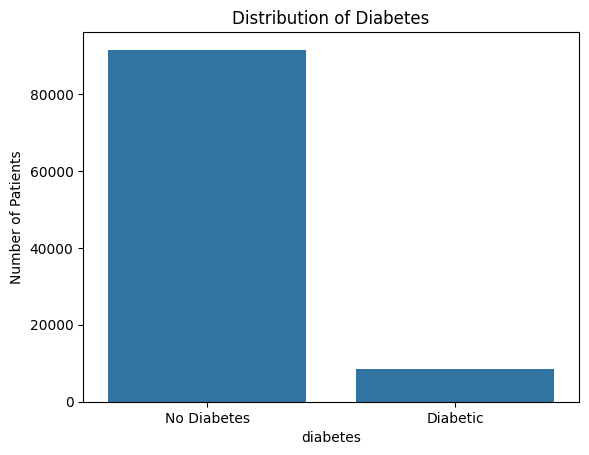

In [14]:
sns.countplot(x='diabetes', data=df)
plt.title("Distribution of Diabetes")
plt.xticks([0,1], ['No Diabetes', 'Diabetic'])
plt.ylabel("Number of Patients")
plt.show()


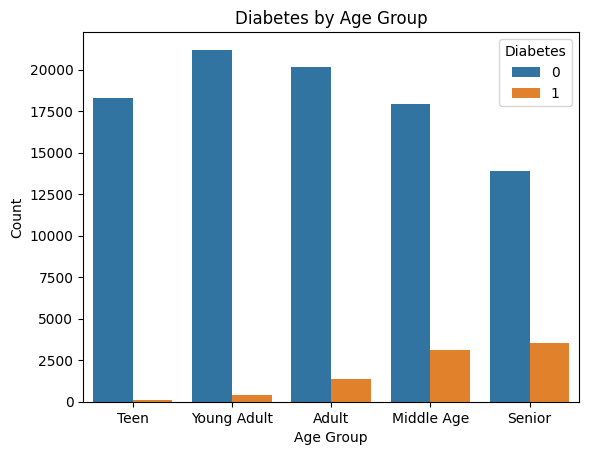

In [15]:
sns.countplot(x='age_group', hue='diabetes', data=df)
plt.title("Diabetes by Age Group")
plt.ylabel("Count")
plt.xlabel("Age Group")
plt.legend(title="Diabetes")
plt.show()

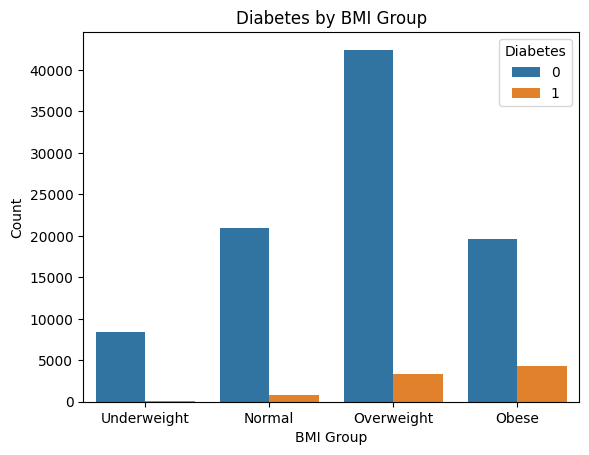

In [16]:
sns.countplot(x='bmi_group', hue='diabetes', data=df)
plt.title("Diabetes by BMI Group")
plt.ylabel("Count")
plt.xlabel("BMI Group")
plt.legend(title="Diabetes")
plt.show()

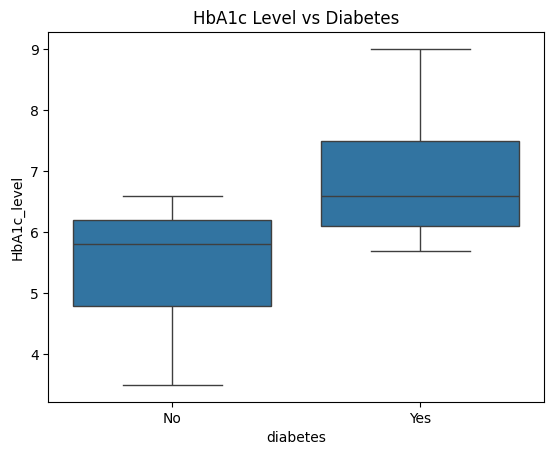

In [17]:
# HbA1c by diabetes
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title("HbA1c Level vs Diabetes")
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

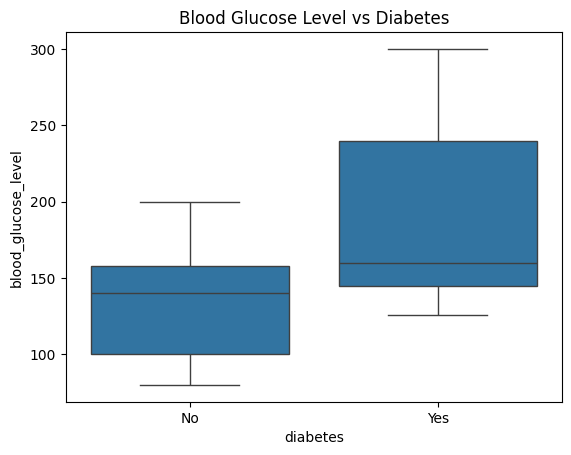

In [18]:
# Blood glucose by diabetes
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title("Blood Glucose Level vs Diabetes")
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

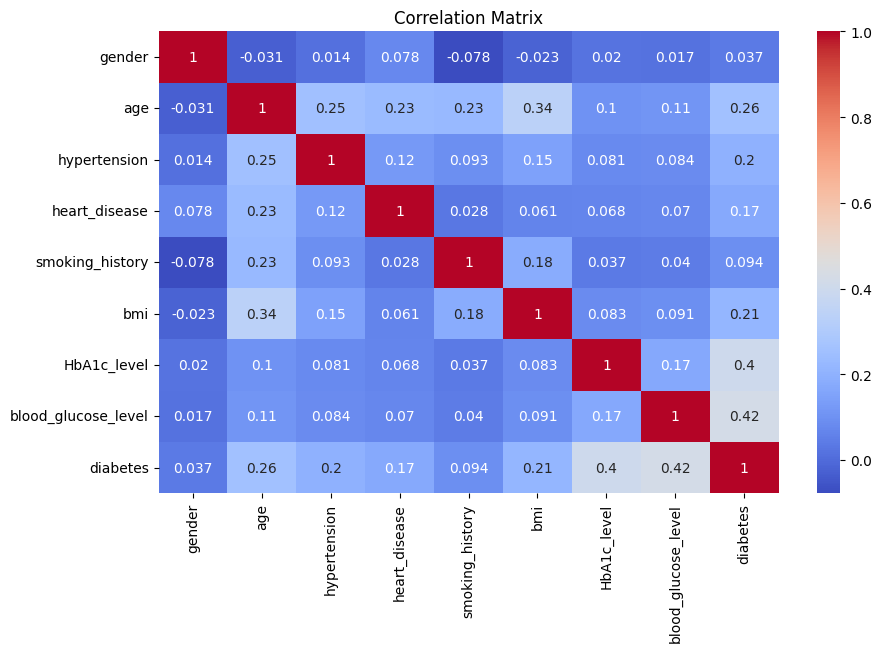

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Select features (you can include more if you'd like)
features = ['age', 'gender', 'hypertension', 'heart_disease', 'smoking_history',
            'bmi', 'HbA1c_level', 'blood_glucose_level']
X = df[features]
y = df['diabetes']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9603

Confusion Matrix:
 [[18122   178]
 [  616  1084]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.64      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.81      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [22]:
# Logistic Regression coefficients
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coeff_df)


               Feature  Coefficient
6          HbA1c_level     2.334315
2         hypertension     0.793280
3        heart_disease     0.779616
1               gender     0.311949
4      smoking_history     0.102698
5                  bmi     0.090518
0                  age     0.045073
7  blood_glucose_level     0.033621


In [23]:
df.to_csv("cleaned_diabetes_dataset.csv", index=False)